In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plot_init
import matplotlib.dates as mdates
import datetime

In [4]:
usherdata = pd.read_csv('ushers.csv')
usherdata['time'] = pd.to_datetime(usherdata['time'], origin='unix',unit='ms')
print(usherdata.head())

#usherdata.time = pd.to_datetime(usherdata.time, unit='ms', origin='unix')




   index                    time         x         y         z  intensity
0      0 2020-02-06 06:28:57.230 -0.000068  0.000049  0.000710          1
1      1 2020-02-06 06:28:57.236 -0.000021  0.000482  0.000847          1
2      2 2020-02-06 06:28:57.241  0.000014  0.000353  0.000655          1
3      3 2020-02-06 06:28:57.247  0.000014  0.000353  0.000655          1
4      4 2020-02-06 06:28:57.252 -0.000092  0.000197  0.000925          1


In [61]:
usherdata.head(125)
period=usherdata.time[9749]-usherdata.time[0]
period

Timedelta('0 days 00:00:35.357000')

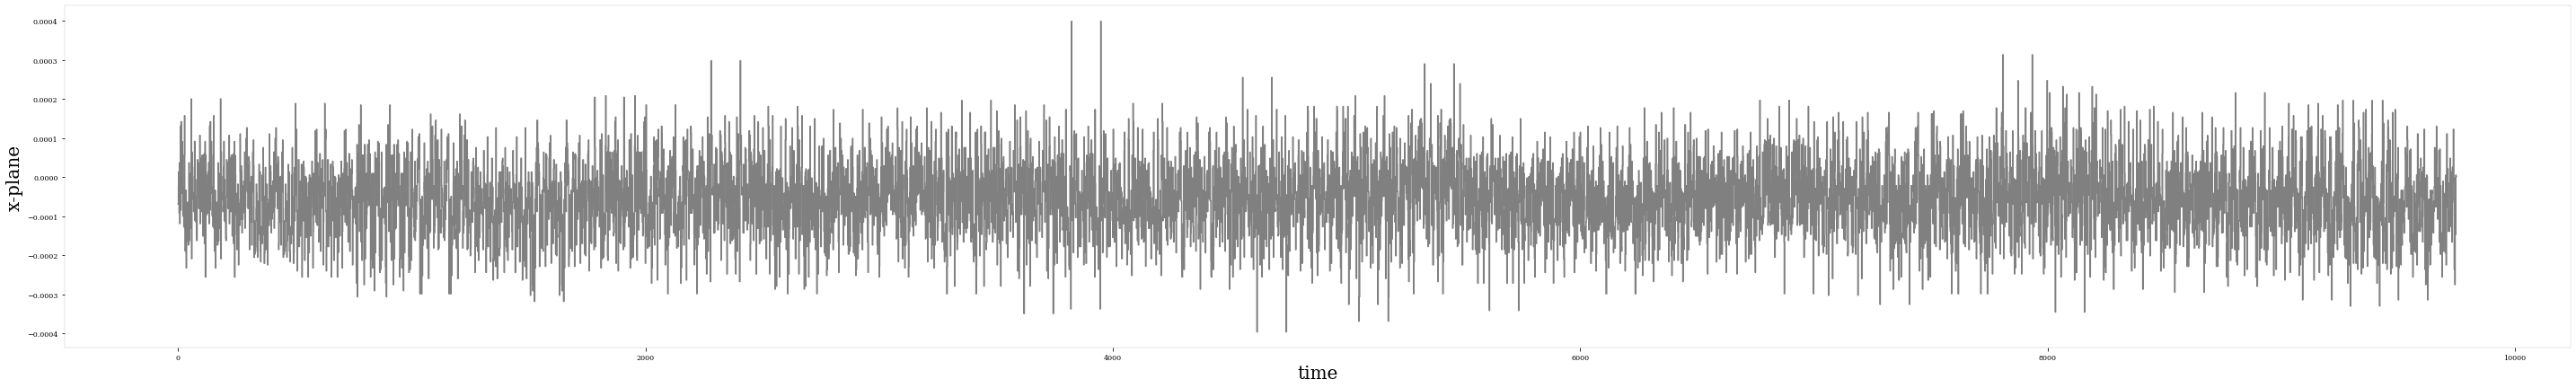

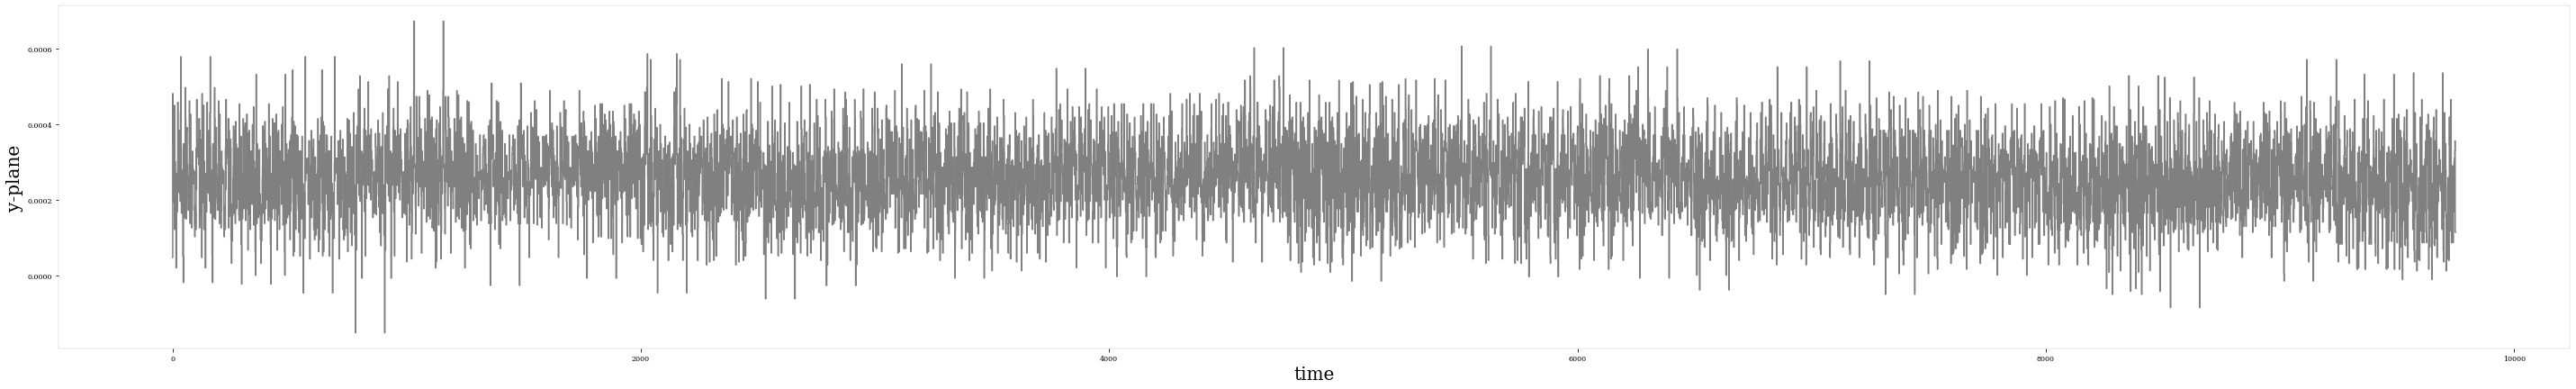

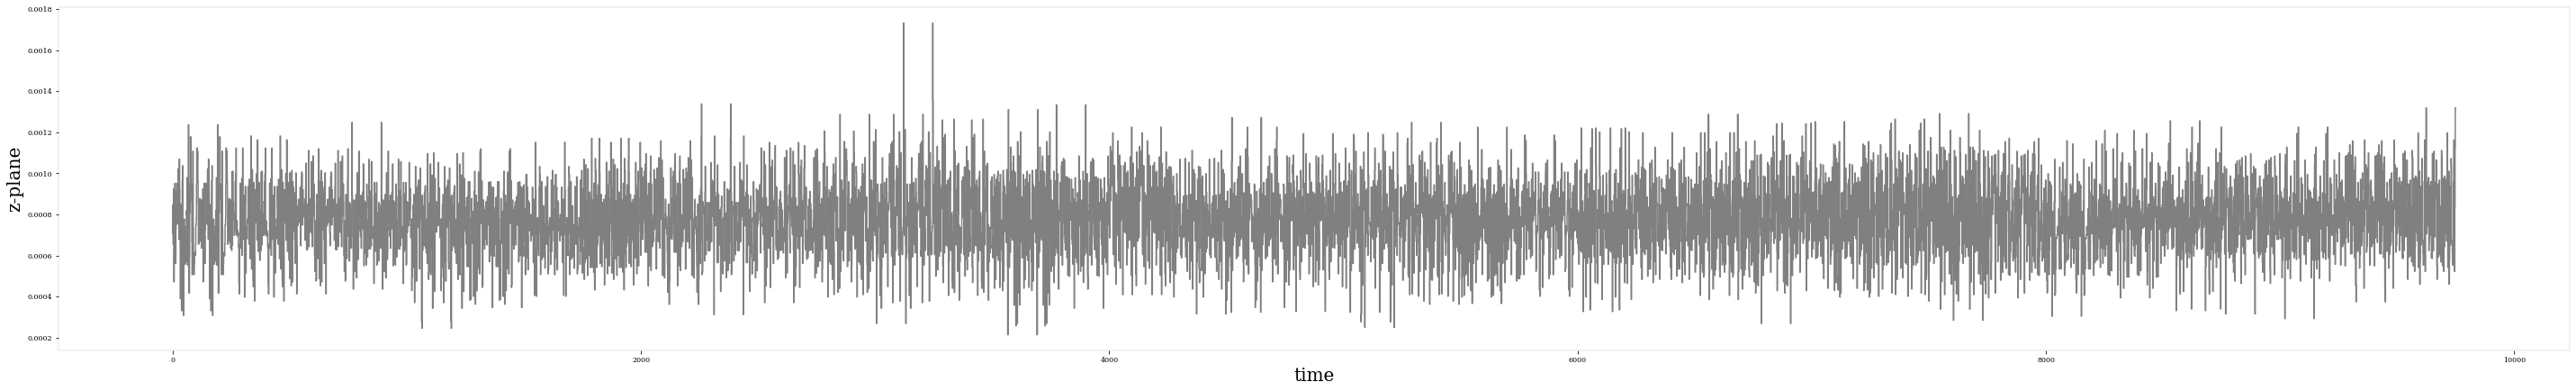

In [7]:
direction = ['x','y','z']
for i in direction:
    fig, ax = plt.subplots(1,figsize =(50,7))
    ax.step(usherdata.index, usherdata[i], where="post",color='0.5')
    ax.set_xlabel("time")
    ax.set_ylabel("%s-plane"%i)


In [8]:
usherdata.x

0      -0.000068
1      -0.000021
2       0.000014
3       0.000014
4      -0.000092
          ...   
9745   -0.000002
9746   -0.000146
9747    0.000006
9748    0.000002
9749    0.000002
Name: x, Length: 9750, dtype: float64

In [28]:
#moving and exponential averages
roll_ave_x = usherdata.x.rolling(window=124).mean()
expo_x = usherdata.x.ewm(span=124,adjust=False).mean()

roll_ave_y = usherdata.y.rolling(window=124).mean()
expo_y = usherdata.y.ewm(span=124,adjust=False).mean()

roll_ave_z = usherdata.z.rolling(window=124).mean()
expo_z = usherdata.z.ewm(span=124,adjust=False).mean()

In [80]:
roll_max_x = usherdata.x.rolling(window=124).max()
roll_max_y = usherdata.y.rolling(window=124).max()
roll_max_z = usherdata.z.rolling(window=124).max()

roll_min_x = usherdata.x.rolling(window=124).min()
roll_min_y = usherdata.y.rolling(window=124).min()
roll_min_z = usherdata.z.rolling(window=124).min()

### Investigating moving averages (rolling and exponential)

Background: 124 Datapoints are generated each second, these datapoints are generated temporally uniform within a second

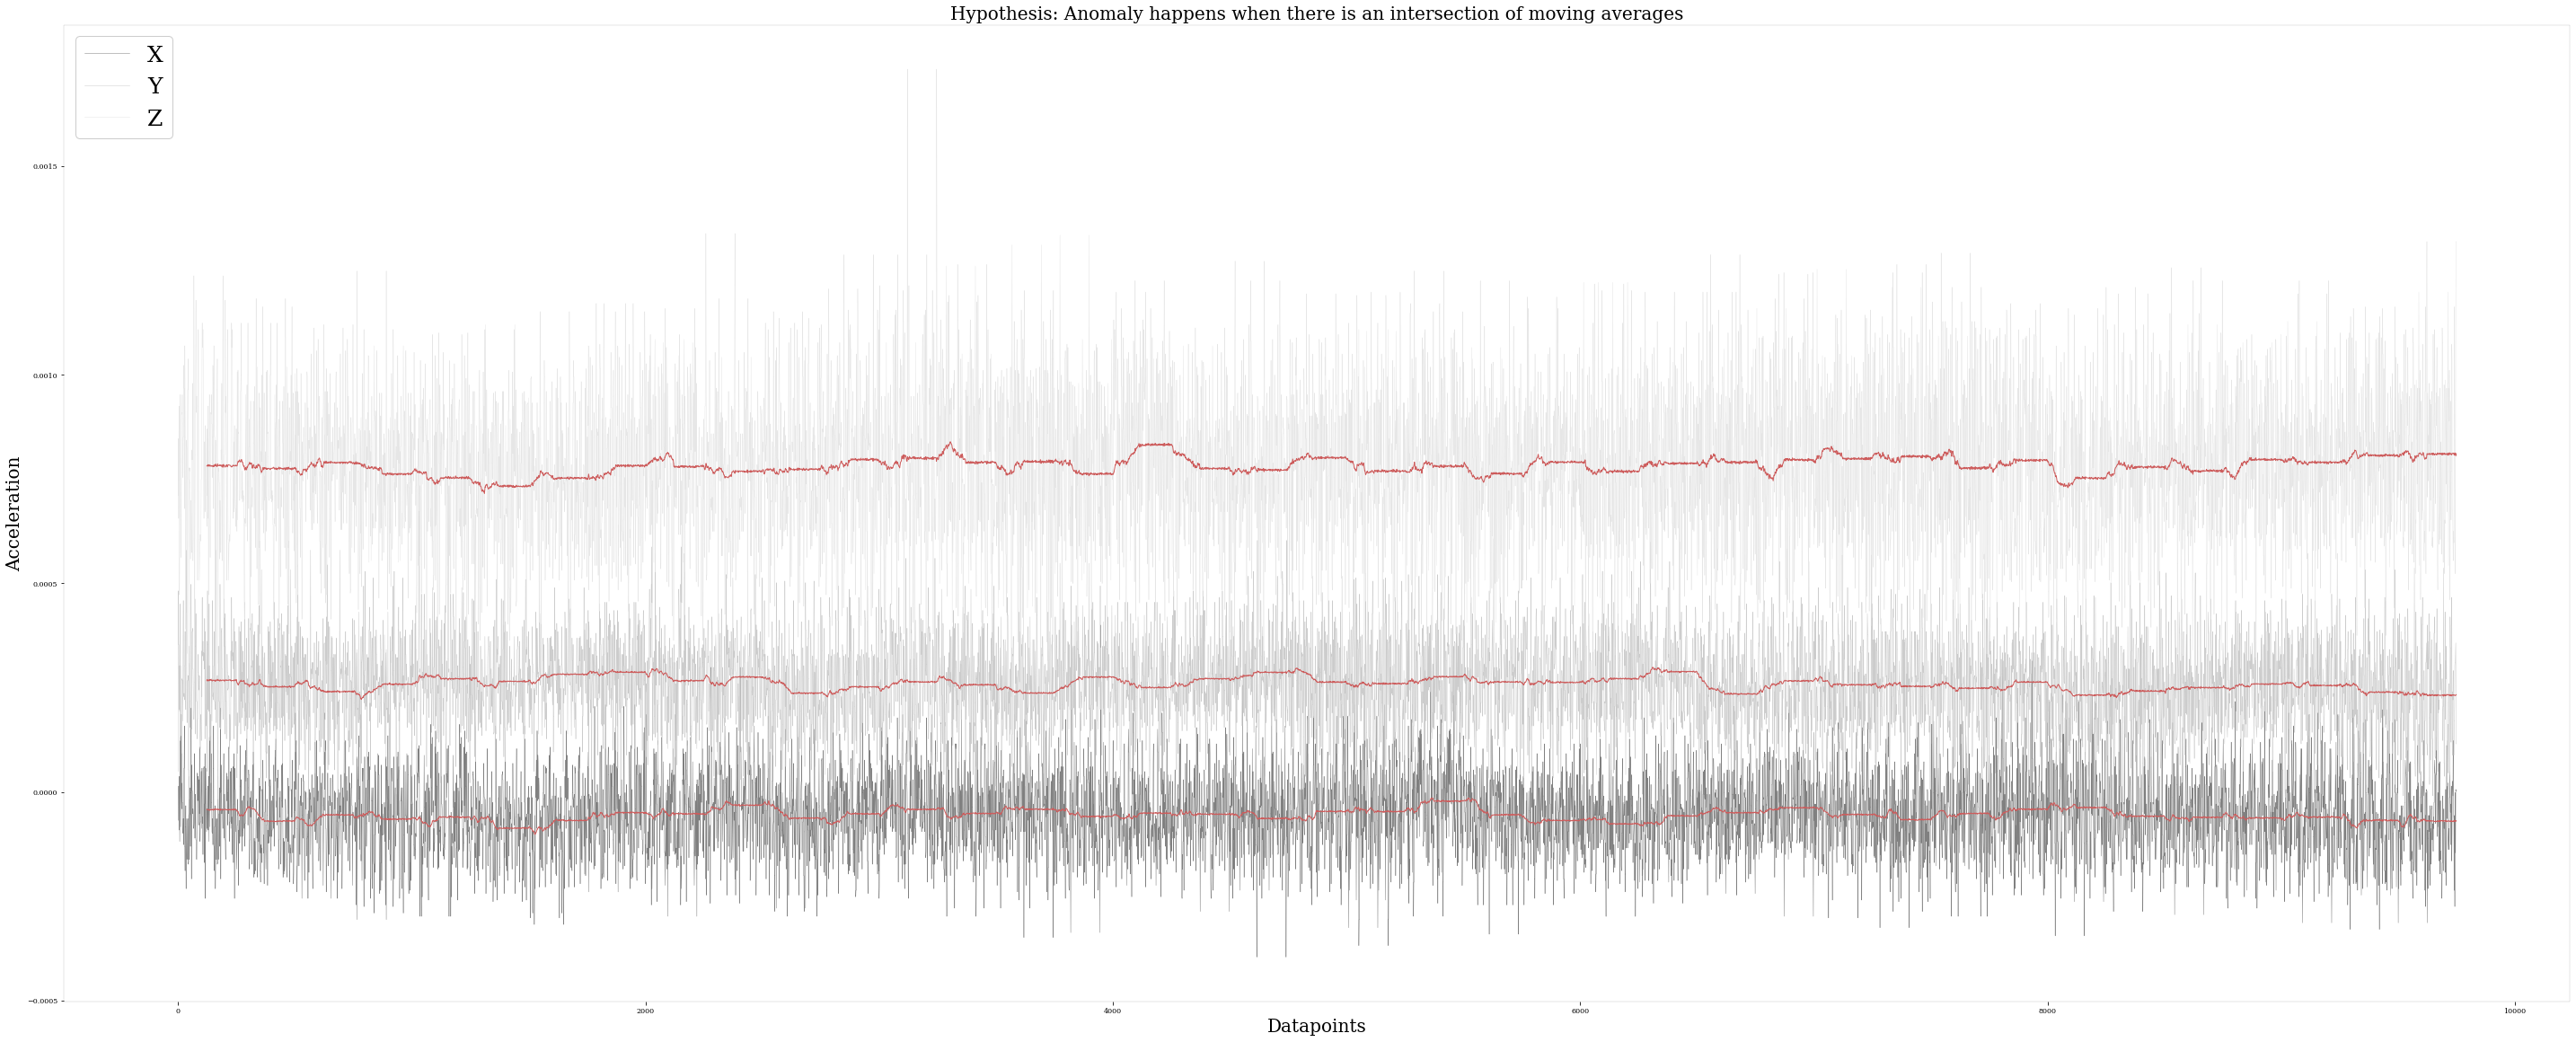

In [92]:
fig = plt.figure(figsize=(50,20))

plt.plot(usherdata.index,usherdata['x'], label='X',color='0.5',linewidth='0.5')
plt.plot(usherdata.index,usherdata['y'], label='Y',color='0.8',linewidth='0.5')
plt.plot(usherdata.index,usherdata['z'], label='Z',color='0.9',linewidth='0.5')
plt.xlabel('Datapoints')
plt.ylabel('Acceleration')
plt.title('Hypothesis: Anomaly happens when there is an intersection of moving averages')

plt.plot(usherdata.index,roll_ave_x,color='indianred',linewidth='1')
#plt.plot(usherdata.index,roll_max_x,color='yellow',linewidth='1')
#plt.plot(usherdata.index,roll_min_x,color='green',linewidth='1')
    #plt.plot(usherdata.index,expo_x, label='EMA(124)',color='green',linewidth='1')
plt.plot(usherdata.index,roll_ave_y,color='indianred',linewidth='1')
#plt.plot(usherdata.index,roll_max_y,color='yellow',linewidth='1')
#plt.plot(usherdata.index,roll_min_y,color='green',linewidth='1')
    #plt.plot(usherdata.index,expo_y, label='EMA(124)',color='green',linewidth='1')
plt.plot(usherdata.index,roll_ave_z,color='indianred',linewidth='1')
#plt.plot(usherdata.index,roll_max_z,color='yellow',linewidth='1')
#plt.plot(usherdata.index,roll_min_z,color='green',linewidth='1')
    #plt.plot(usherdata.index,expo_z, label='EMA(124)',color='green',linewidth='1')


plt.legend(loc='upper left',prop={'size': 25})

fig.savefig(fname='xyz_mean.pdf',bbox_inches='tight')

### Test correlation, statistical independence of the moving averages

In [37]:
data_ave = {'ave_x':roll_ave_x,'ave_y':roll_ave_y,'ave_z':roll_ave_z}

In [45]:
df_ave = pd.DataFrame(data=data_ave)
df_ave=df_ave.dropna()

In [46]:
df_ave.describe()

,ave_x,ave_y,ave_z
count,9627.000000,9627.000000,9627.000000
mean,-0.000055,0.000259,0.000781
std,0.000013,0.000015,0.000020
min,-0.000102,0.000221,0.000715
25%,-0.000064,0.000250,0.000769
50%,-0.000055,0.000259,0.000782
75%,-0.000047,0.000269,0.000795
max,-0.000015,0.000298,0.000839


In [75]:
df_ave.to_csv('moving_ave.csv',index=False, header=True)

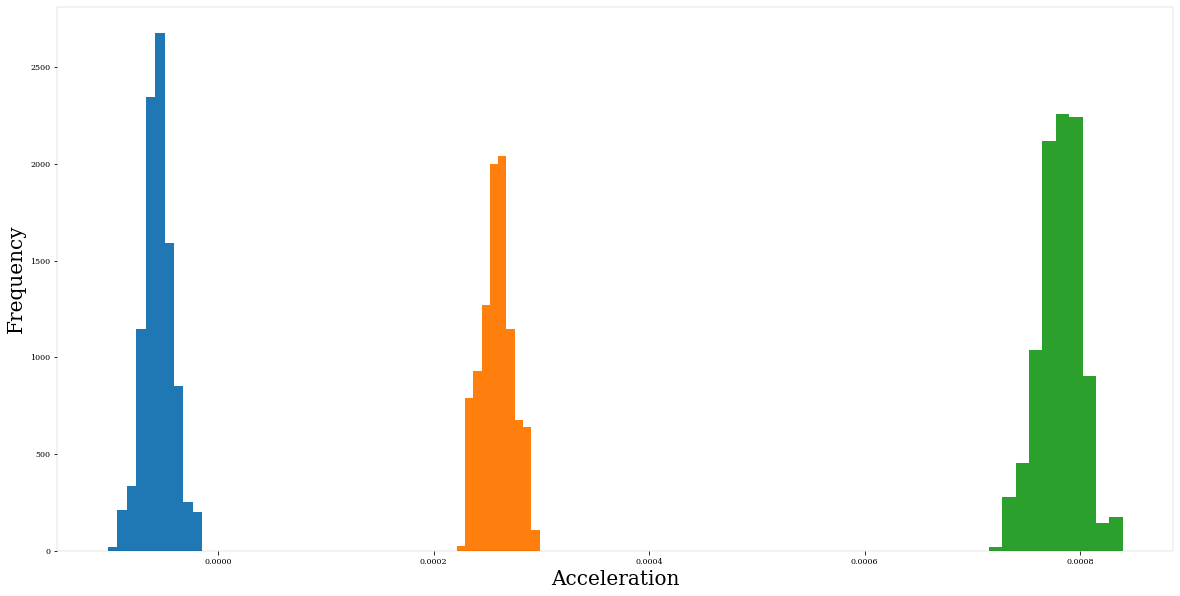

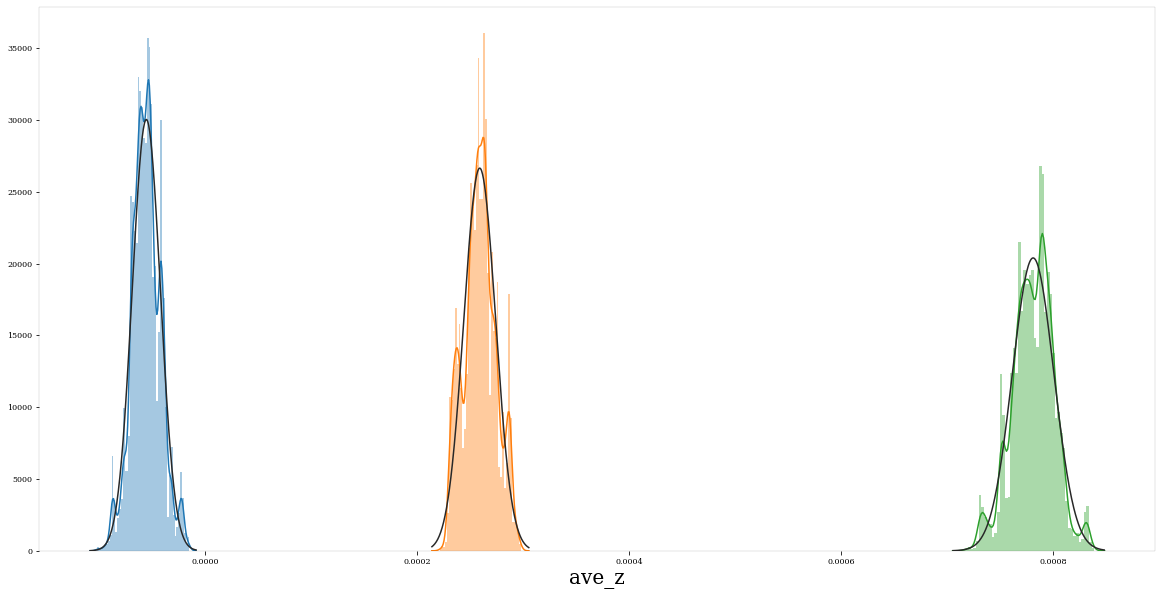

In [94]:
fig = plt.figure(figsize=(20,10))

df_ave['ave_x'].plot(kind="hist")
df_ave['ave_y'].plot(kind="hist")
df_ave['ave_z'].plot(kind="hist")
plt.xlabel('Acceleration')

fig = plt.figure(figsize=(20,10))
plt.xlabel('Acceleration')

sns.distplot(df_ave['ave_x'], fit = norm)
sns.distplot(df_ave['ave_y'], fit = norm)
sns.distplot(df_ave['ave_z'], fit = norm)

In [95]:
import seaborn as sns
from scipy.stats import norm, entropy

inf